# 2. Regression - Homework

In [1]:
# Jupyter Notebook for Laptop Price Prediction Homework

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')

In [2]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Filter the dataset to only use selected columns
df = df[['ram', 'storage', 'screen', 'final_price']]

In [4]:
# EDA
# Check for missing values
missing_columns = df.isnull().sum()
print(missing_columns)

ram            0
storage        0
screen         4
final_price    0
dtype: int64


### EDA

* Look at the `final_price` variable. Does it have a long tail? 

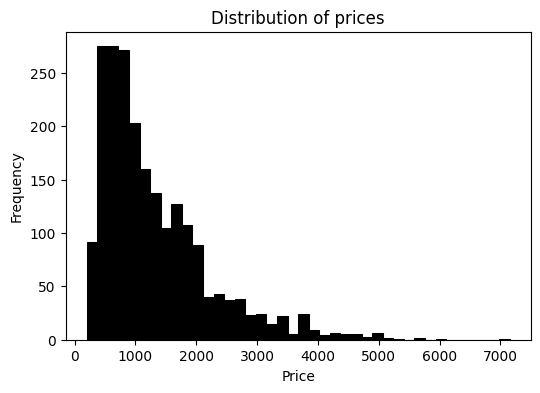

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 4))
sns.histplot(df.final_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [17]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


## Question 1: Identify the column with missing values

In [5]:
print("Missing Values by Column:\n", missing_columns)

Missing Values by Column:
 ram            0
storage        0
screen         4
final_price    0
dtype: int64


## Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [10]:
ram_median = df['ram'].median()
print(f"Median of 'ram': {ram_median}")

Median of 'ram': 16.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [45]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [46]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = (df_train.final_price.values)
y_val = (df_val.final_price.values)
y_test = (df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [47]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [48]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Filling with 0

In [49]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [50]:
base = ['ram', 'storage', 'screen']

In [51]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [52]:
y_pred = w_0 + X_train.dot(w)

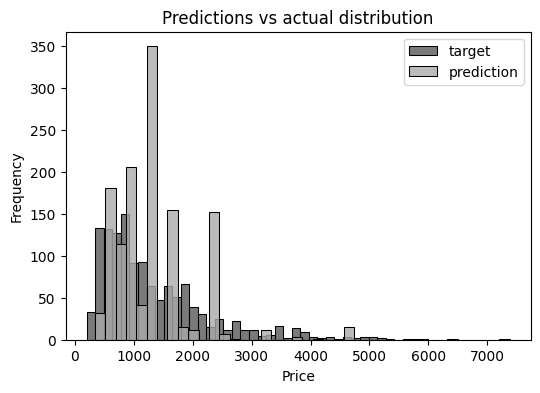

In [53]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

In [54]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [55]:
rmse(y_val, y_pred)

597.3635593619622

### Filling with mean

In [56]:
def prepare_X_mean_na(df):
    df_num = df[base]
    df_num['screen'] = df_num['screen'].fillna(df_num['screen'].mean())
    X = df_num.values
    return X

In [57]:
X_train = prepare_X_mean_na(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [58]:
y_pred = w_0 + X_train.dot(w)

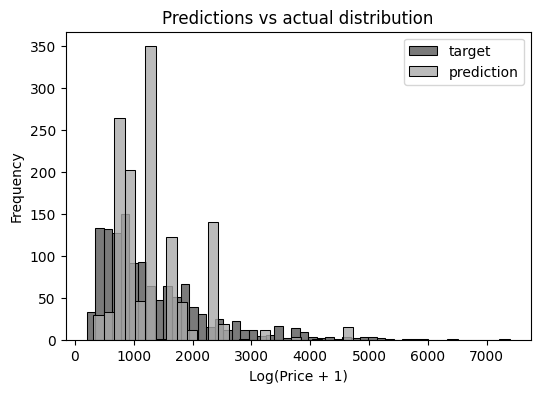

In [59]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [60]:
X_val = prepare_X_mean_na(df_val)
y_pred = w_0 + X_val.dot(w)

In [61]:
rmse(y_val, y_pred)

600.2619483181334

It is slightly better with the NaN's filled with 0

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [62]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [63]:
X_train = prepare_X(df_train)

In [64]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 599.5287033406228
  0.01 599.524982748304
   0.1 599.491950425555
     1 599.2015631830218
     5 598.4493424490059
    10 598.0431030606563
   100 597.4827335978699


The best result is obtained with r=0

## Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [65]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

scores = []

for i_seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(i_seed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.final_price.values
    y_val_orig = df_val.final_price.values
    y_test_orig = df_test.final_price.values

    y_train = (df_train.final_price.values)
    y_val = (df_val.final_price.values)
    y_test = (df_test.final_price.values)

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)

    rmse_result = rmse(y_val, y_pred)

    scores.append(rmse_result)
    print('%6s' %i_seed, rmse_result)
    

     0 565.4520868771027
     1 636.7985423056726
     2 588.9558697907962
     3 597.8148920012521
     4 571.962791511102
     5 573.2383256618949
     6 647.3438328407208
     7 550.4398184485952
     8 587.333503616991
     9 576.1017929433108


In [66]:
np.std(scores)

29.17649125829274

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60


In [98]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = (df_train.final_price.values)
y_val = (df_val.final_price.values)
y_test = (df_test.final_price.values)

df_train = pd.concat([df_train, df_val])
y_train = np.concatenate([y_train, y_val])

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)

rmse_result = rmse(y_test, y_pred)

print(rmse_result)

608.609982204956
